In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
raw_df = pd.read_csv('laptopPrice.csv')
# set the option to display all columns
pd.set_option('display.max_columns', None)

raw_df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [3]:
#raw_df.describe
raw_df.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [4]:
typed_df = raw_df
column_names = typed_df.columns.tolist()
remover = ['Price', 'Number of Ratings', 'Number of Reviews'] #Numerical
column_names = [x for x in column_names if x not in remover]

print(column_names)

['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


In [5]:
typed_df[column_names] = typed_df[column_names].astype('string')
typed_df.dtypes

brand                string
processor_brand      string
processor_name       string
processor_gnrtn      string
ram_gb               string
ram_type             string
ssd                  string
hdd                  string
os                   string
os_bit               string
graphic_card_gb      string
weight               string
warranty             string
Touchscreen          string
msoffice             string
Price                 int64
rating               string
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [6]:
#typed_df['ram_gb']
typed_df['ram_gb'].describe()

count      823
unique       4
top       8 GB
freq       418
Name: ram_gb, dtype: object

In [8]:
correlation_matrix = typed_df.corr()

C:\Users\Gerson Santos\AppData\Local\Temp\ipykernel_25144\3715540523.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = typed_df.corr()


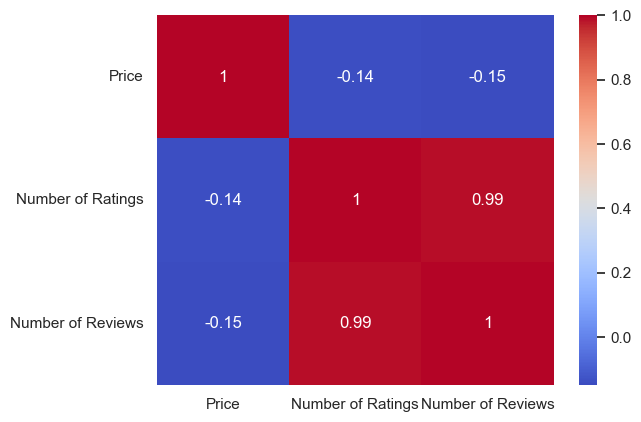

In [9]:

# Plot a heatmap of the correlation matrix using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [13]:
contigency_table = pd.crosstab(typed_df['Price'],[typed_df['brand'], typed_df['ram_gb']])
print(contigency_table)

brand  APPLE                    ASUS               Avita              DELL    \
ram_gb  16 GB 32 GB 4 GB  8 GB   16 GB 4 GB  8 GB   16 GB 4 GB  8 GB   16 GB   
Price                                                                          
16990       0     0     0     0      0     0     0      0     0     0      0   
17490       0     0     0     0      0     0     0      0     1     0      0   
17990       0     0     0     0      0     1     0      0     0     0      0   
18990       0     0     0     0      0     1     0      0     0     0      0   
20490       0     0     0     0      0     1     0      0     0     0      0   
...       ...   ...   ...   ...    ...   ...   ...    ...   ...   ...    ...   
279990      0     0     0     0      0     0     0      0     0     0      0   
291190      0     0     0     0      0     0     0      0     0     0      0   
299990      0     0     0     0      1     0     0      0     0     0      0   
309990      0     1     0     0      0  

In [14]:
from scipy.stats import chi2_contingency
# Perform a chi-squared test of independence between survival and sex/pclass
chi2, pval, dof, expected = chi2_contingency(contigency_table)

print(f"Chi-squared test statistic: {chi2:.2f}")
print(f"P-value: {pval:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared test statistic: 11380.66
P-value: 0.0000
Degrees of freedom: 10100
Expected frequencies:
[[0.01579587 0.00121507 0.00121507 ... 0.00121507 0.01579587 0.03402187]
 [0.01579587 0.00121507 0.00121507 ... 0.00121507 0.01579587 0.03402187]
 [0.01579587 0.00121507 0.00121507 ... 0.00121507 0.01579587 0.03402187]
 ...
 [0.01579587 0.00121507 0.00121507 ... 0.00121507 0.01579587 0.03402187]
 [0.01579587 0.00121507 0.00121507 ... 0.00121507 0.01579587 0.03402187]
 [0.01579587 0.00121507 0.00121507 ... 0.00121507 0.01579587 0.03402187]]


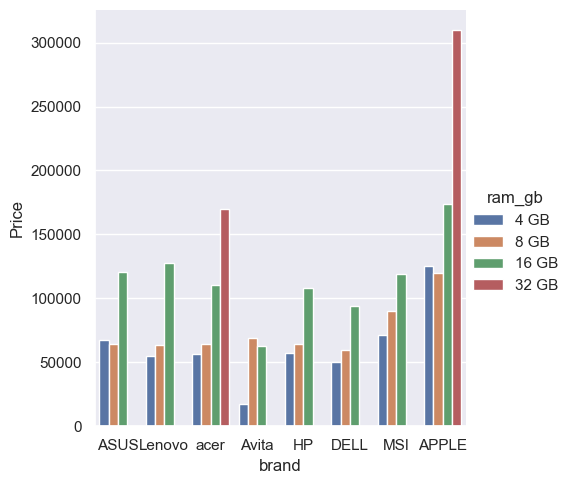

In [17]:
# Create a stacked bar chart of survival by sex and passenger class
sns.catplot(x='brand', y='Price', hue='ram_gb', kind='bar', data=typed_df, errorbar=None)

# Show the plot
plt.show()

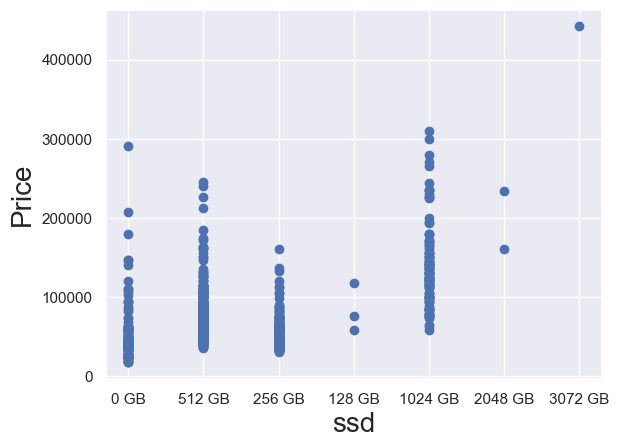

In [22]:
plt.scatter(typed_df['ssd'],typed_df['Price'])
plt.xlabel('ssd',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()